# Introduction to Biopython
---
### R. Burke Squires
### NIAID Bioinformatics & Computational Biosciences Branch

## Python Programming for Scientists Series
---
- Introduction to Jupyter Notebook
- Introduction to Python Programming
- Introduction to Biopython Programming
- Introduction to Data Analysis with Python
- Introduction to Data Visualization with Python

---

This notebook is adapted from:
- the [biopython tutorial and cookbook](http://biopython.org/DIST/docs/tutorial/Tutorial.html) and 
- a workshop given by Peter Cock [here](https://github.com/peterjc/biopython_workshop)

---

## How to install biopython

- This notebook assumes you have the the [Anaconda python distribution](https://www.continuum.io/downloads) installed for your platform. If you do not please see the 

- Use the **conda** package manager to install the biopython package. You can run the following command (without the preceeding exclimation mark (!) in the terminal or command prompt or you can run the cell below.

In [1]:
!conda update -y conda

Using Anaconda Cloud api site https://api.anaconda.org
Fetching package metadata: ....
# All requested packages already installed.
# packages in environment at //anaconda:
#
conda                     4.0.5                    py35_0  


In [2]:
!conda update -y anaconda

Using Anaconda Cloud api site https://api.anaconda.org
Fetching package metadata: ....
# All requested packages already installed.
# packages in environment at //anaconda:
#
anaconda                  4.0.0               np110py35_0  


In [3]:
!conda install -y biopython

Using Anaconda Cloud api site https://api.anaconda.org
Fetching package metadata: ....
Solving package specifications: .........

Package plan for installation in environment //anaconda:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    biopython-1.66             |      np110py35_0         2.1 MB

The following NEW packages will be INSTALLED:

    biopython: 1.66-np110py35_0 (soft-link)

Error: Missing write permissions in: //anaconda
#
# You don't appear to have the necessary permissions to install packages
# into the install area '//anaconda'.
# However you can clone this environment into your home directory and
# then make changes to it.
# This may be done using the command:
#
# $ conda create -n my_root --clone=//anaconda



You can confirm the installation by importing the module and checking its version.

In [1]:
import Bio
Bio.__version__

'1.66'

---

# What is biopython

"Biopython is a set of freely available tools for **biological** computation written in **Python** by an international team of developers."

"￼It is a distributed **collaborative** effort to develop Python libraries and applications which address the needs of current and future work in bioinformatics￼"

---

What areas of bioinformatics does biopython support? (This could also be labelled: How do I get help for biopython?):

In [ ]:
help(Bio)

# Lets gets started!

Lets download the sequence file we will be using but implementing some biopython code:

In [2]:
from Bio import Entrez
from Bio import SeqIO

Entrez.email='angueyra@nih.gov' #please update with your email address
#gb = genbank format
#fasta = fasta format
temp = Entrez.efetch(db="nucleotide", rettype="gb", id="NC_002549") 
gbseq = SeqIO.read(temp, "gb")

#open an output file in the current directory and write data to it
out = open("data/ebola.gbk",'w')

# To download to a specific location using an absolute path try something like this:
#out = open("/Users/squiresrb/Documents/BCBB/Seminars/2015/Introduction to Biopython/ebola.gbk",'w')

SeqIO.write(gbseq, out, "gb")

temp.close()
out.close()

In [3]:
# What is our current diectory?
!pwd

/Users/angueyraaristjm/Documents/Python/PythonIntro/03_Intro to Biopython


In [4]:
# To see the file open the data folder in the current directory (Mac specific):

!open ./data/

Next lets convert the GenBank file to a FASTA file for us to use...

# What features are available in the Genbank file?

In [5]:
genome = SeqIO.read('data/ebola.gbk','genbank') #you MUST tell SeqIO what format is being read
feats = set()
for feat in genome.features:
    feats.add(feat.type)
feats

{"3'UTR",
 "5'UTR",
 'CDS',
 'gene',
 'mRNA',
 'misc_feature',
 'regulatory',
 'source'}

## Converting a Sequence File

In [6]:
from Bio import SeqIO
count = SeqIO.convert("data/ebola.gbk", "gb", "data/ebola.fa", "fasta")
print("You have converted %i file(s)." % count)

You have converted 1 file(s).


Now we want to extract the proteins translations from the GenBank file and save them to a new file:

In [7]:
from Bio import SeqIO
gbk_filename = "data/ebola.gbk"
faa_filename = "data/ebola.fa"
input_handle  = open(gbk_filename, "r")
output_handle = open(faa_filename, "w")

for seq_record in SeqIO.parse(input_handle, "genbank") :
    print("Dealing with GenBank record %s" % seq_record.id)
    for seq_feature in seq_record.features :
        if seq_feature.type=="CDS" : #CDS = coding sequence
            loc = seq_feature.location
            output_handle.write(">%s from %s\n%s\n" % (
                    seq_feature.qualifiers['gene'][0],
                    seq_feature.qualifiers['locus_tag'][0],
                    seq_record.seq[loc.start.position:loc.end.position]))

output_handle.close()
input_handle.close()

Dealing with GenBank record NC_002549.1


We would normally extract the transcript from the GenBank file, but for our purposes today we are going to translate the gene sequences.

In [9]:
from Bio import SeqIO
gbk_filename = "data/ebola.fa"
faa_filename = "data/ebola.faa"
input_handle  = open(gbk_filename, "r")
output_handle = open(faa_filename, "w")

for seq_record in SeqIO.parse(input_handle, "fasta") :
    output_handle.write(">%s\n%s\n" % (
       seq_record.id,
       seq_record.seq.translate()))

output_handle.close()
input_handle.close()

//anaconda/lib/python3.5/site-packages/Bio/Seq.py:2041: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


In [8]:
whos

Variable        Type               Data/Info
--------------------------------------------
Bio             module             <module 'Bio' from '//ana<...>ackages/Bio/__init__.py'>
Entrez          module             <module 'Bio.Entrez' from<...>/Bio/Entrez/__init__.py'>
SeqIO           module             <module 'Bio.SeqIO' from <...>s/Bio/SeqIO/__init__.py'>
count           int                1
faa_filename    str                data/ebola.fa
feat            SeqFeature         type: 3'UTR\nlocation: [1<...>tative trailer region']\n
feats           set                {'mRNA', 'gene', 'CDS', "<...>, 'source', 'regulatory'}
gbk_filename    str                data/ebola.gbk
gbseq           SeqRecord          ID: NC_002549.1\nName: NC<...>CA', IUPACAmbiguousDNA())
genome          SeqRecord          ID: NC_002549.1\nName: NC<...>CA', IUPACAmbiguousDNA())
input_handle    TextIOWrapper      <_io.TextIOWrapper name='<...>ode='r' encoding='UTF-8'>
loc             FeatureLocation    [11580:1821

## Looking at the Sequence Records

"SeqIO.parse" function creates SeqRecord objects. 

Biopython's "SeqRecord" objects are a container holding the sequence, and any annotation about it - most importantly the identifier.

For FASTA files, the record identifier is taken to be the first word on the ">" line -- anything after a space is *not* part of the identifier.

This simple example prints out the record identifers and their lengths


In [10]:
from Bio import SeqIO
filename = "data/ebola.fa"
for record in SeqIO.parse(filename, "fasta"):
    print("Record %s, length %i" % (record.id, len(record.seq)))

Record NP, length 2220
Record VP35, length 1023
Record VP40, length 981
Record GP, length 2030
Record GP, length 1095
Record GP, length 895
Record VP30, length 867
Record VP24, length 756
Record L, length 6639


### Excercise 

    A. Count how many sequences are <100 amino acids long
    
    B. Create a modified script "total_length.py" based on the above examples which counts the number of records and calculates the total length of all the sequences (i.e. "21 + 820 + 310 + 428 + ... + 46 + 228"), giving:
        
        a. $ python total_length.py
        b. 4141 records, total length 1311442
    
    C. Plot a histogram of the sequence length distribution (tip - see the `Biopython Tutorial & Cookbook)




1. The "SeqRecord" objects the identifiers are stored as standard Python strings (e.g. ".id"). For the sequence, Biopython uses a string-like "Seq" object, accessed as ".seq".

2. In many ways the "Seq" objects act like Python strings, you can print them, take their length using the "len(...)" function, and slice them with square brackets to get a sub-sequence or a single letter.


## Record Lengths

1. Using "SeqIO.parse(...)" in a for loop, for each record print out the identifier, the first 10 letters of each sequences, the last 10 letters


In [ ]:
from Bio import SeqIO
filename = "data/ebola.fa"
for record in SeqIO.parse(filename, "fasta"):
    start_seq = record.seq[:10] # first 10 letters
    end_seq = record.seq[-10:] # last 10 letters
    print(record.id + " " + start_seq + "..." + end_seq)

## Check for Initial Methionine

In [11]:
from Bio import SeqIO

filename = "data/ebola.faa"
bad = 0
for record in SeqIO.parse(filename, "fasta"):
    if not record.seq.startswith("M"):
        bad = bad + 1
        print(record.id + " starts " + record.seq[0])

print("Found " + str(bad) + " records in " + filename + " which did NOT start with M")

Found 0 records in data/ebola.faa which did NOT start with M


Excercise:

   1. Modify this script to print out the description of the problem records, not just the identifier. *Tip*: Try reading the documentation, e.g. Biopython's wiki page on the `SeqRecord <http://biopython.org/wiki/SeqRecord>`.


## Check for Stop Codons

1. Let's check the example protein FASTA files for any "*" symbols in the sequence. For this you can use several of the standard Python string operations which also apply to "Seq" objects


In [13]:
from Bio import SeqIO
filename = "data/ebola.faa"
contains_star = 0
ends_with_star = 0
print("Checking " + filename + " for terminal stop codons")
for record in SeqIO.parse(filename, "fasta"):
    if record.seq.count("*"):
        contains_star = contains_star + 1
    if record.seq.endswith("*"):
        ends_with_star = ends_with_star + 1
print(str(contains_star) + " records with * in them")
print(str(ends_with_star) + " with * at the end")

Checking data/ebola.faa for terminal stop codons
8 records with * in them
7 with * at the end


## Different File Formats:

1. If you work with finished genomes, you'll often see nicely annotated files in the EMBL or GenBank format. Let's try this with the *Ebola* GenBank file, "data/ebola.gbk", based on the previous example:


In [ ]:
from Bio import SeqIO
genbank_record = SeqIO.read("data/ebola.gb", "genbank")
print(genbank_record.id + " length " + str(len(genbank_record)))

In [ ]:
from Bio import SeqIO
help(SeqIO.convert)

In [ ]:
from Bio import SeqIO
input_filename = "data/ebola.gb"
output_filename = "data/ebola.fasta"
count = SeqIO.convert(input_filename, "gb", output_filename, "fasta")
print(str(count) + " records converted")

### Exercise: 
   
   1.Modify this to add command line parsing to take the input and output filenames as arguments


## Filtering a Sequence File: 

1. Suppose we wanted to filter a FASTA file by length, for example exclude protein sequences less than 500 amino acids long.

In [14]:
from Bio import SeqIO

input_filename = "data/ebola.faa"
output_filename = "data/ebola_long_only.faa"

count = 0
total = 0

output_handle = open(output_filename, "w")

for record in SeqIO.parse(input_filename, "fasta"):
    total = total + 1
    if 500 <= len(record.seq):
        count = count + 1
        SeqIO.write(record, output_handle, "fasta")

output_handle.close()
print(str(count) + " records selected out of " + str(total))

3 records selected out of 9


## Editing Sequences

1. Previous examples had a terminal "*” character (stop codon). Python strings, Biopython "Seq" and "SeqRecord" objects can all be *sliced* to extract a sub-sequence or partial record. In this case, we want to take everything up to but excluding the final letter:


In [15]:
from Bio import SeqIO
input_filename = "data/ebola.faa"
output_filename = "data/ebola_no_stars.faa"
output_handle = open(output_filename, "w")
for record in SeqIO.parse(input_filename, "fasta"):
    if record.seq.endswith("*"):
        record = record[:-1]
        SeqIO.write(record,output_handle, "fasta")
    else:
        SeqIO.write(record,output_handle, "fasta")
        
output_handle.close()

## Filtering by Record Name

1. A very common task is pulling out particular sequences from a large sequence file. Membership testing with Python lists (or sets) is one neat way to do this.

2. Write a new script starting as follows which writes out the potato proteins on this list


In [ ]:
from Bio import SeqIO
wanted_ids = ["VP30", "VP35", "VP40"]
input_filename = "data/ebola.faa"
output_filename = "data/wanted_proteins.fasta"
count = 0
total = 0
output_handle = open(output_filename, "w")
for record in SeqIO.parse(input_filename, "fasta"):
    total = total + 1
    if record.id in wanted_ids:
        count = count + 1
        SeqIO.write(record, output_handle, "fasta")
output_handle.close()
print(str(count) + " records selected out of " + str(total))

### Advanced Exercise 

    A. Modify this to read the list of wanted identifiers from a plain text input file (one identifier per line).

### Discussion:

    A. What happens if a wanted identifier is not in the input file? 
    
    B. What happens if an identifier appears twice? 
    
    C. What order is the output file?


## Histogram of sequence lengths

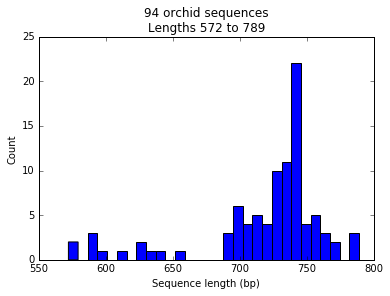

In [19]:
%matplotlib inline

from Bio import SeqIO
#list compression command = enclosing for loop in []
sizes = [len(rec) for rec in SeqIO.parse("data/ls_orchid.fasta", "fasta")]

import pylab
pylab.hist(sizes, bins=30)
pylab.title("%i orchid sequences\nLengths %i to %i" \
            % (len(sizes),min(sizes),max(sizes)))
pylab.xlabel("Sequence length (bp)")
pylab.ylabel("Count")
pylab.show()

## Reading Multiple Sequence Alignments

In [20]:
from Bio import AlignIO
alignment = AlignIO.read("data/PF05371_seed.sth", "stockholm")
print(alignment)

SingleLetterAlphabet() alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


In many ways, the alignment acts like a list of "SeqRecord" objects (just like you would get from "SeqIO"). 


In [21]:
print(len(alignment))

7


The length of the alignment is the number of rows for example, and you can loop over the rows as individual "SeqRecord" objects:


In [22]:
for record in alignment:
    print(record.id + " has " + str(record.seq.count("-")) + " gaps")

COATB_BPIKE/30-81 has 0 gaps
Q9T0Q8_BPIKE/1-52 has 0 gaps
COATB_BPI22/32-83 has 0 gaps
COATB_BPM13/24-72 has 3 gaps
COATB_BPZJ2/1-49 has 3 gaps
Q9T0Q9_BPFD/1-49 has 3 gaps
COATB_BPIF1/22-73 has 0 gaps


## Exercise:
    
    A. Write a python script called "count_gaps.py" which reports the number or records, the total number of gaps, and the mean (average) number of gaps per record:


## Writing Multiple Sequence Alignment Files

1. As you might guess from using "SeqIO.convert(...)" and "SeqIO.write(...)", there are matching "AlignIO.convert()" and "AlignIO.write(...)" functions.

2. For example, this will convert the Stockholm formatted alignment into a relaxed PHYLIP format file:



In [ ]:
from Bio import AlignIO
input_filename = "data/PF05371_seed.sth"
output_filename = "data/PF05371_seed_converted.phy"
AlignIO.convert(input_filename, "stockholm", output_filename, "phylip-relaxed")

Homework: 

1. Modify this example to convert the Stockholm file into a FASTA alignment file.


## Sorting the Rows

How you can sort the rows by identifier within Biopython:


In [ ]:
from Bio import AlignIO
alignment = AlignIO.read("data/PF05371_seed.sth", "stockholm")
alignment.sort()
print(alignment)

### Exercise:
    
1. Write a Python script "sort_alignment_by_id.py" which uses "AlignIO.read(..)" and "AlignIO.write(..)" to convert "PF08792_seed.sth" into a sorted FASTA file.
    
2. By default the alignment's sort method uses the identifers as the sort key, but much like how sorting a Python list works, you can override this.

3. Define your own function taking a single argument (a "SeqRecord") which returns the number of gaps in the sequence. Use this to sort the alignment and print it to screen (or save it as a new file)


# Sequence Features

## Working with Sequence Features
1. Most of the time GenBank files contain a single record for a single chromosome or plasmid, so we'll generally use the "SeqIO.read(...)" function. Remember the second argument is the file format, so if we start from the code to read in a FASTA file


In [23]:
from Bio import SeqIO
record = SeqIO.read("data/ebola.gbk", "gb")
print(record.id)

NC_002549.1


In [24]:
from Bio import SeqIO
record = SeqIO.read("data/ebola.gbk", "genbank")
print(record.id)
print(len(record))
print(len(record.features))


NC_002549.1
18959
49


In [25]:
my_gene = record.features[3]
print(my_gene)

type: mRNA
location: [55:3026](+)
qualifiers:
    Key: db_xref, Value: ['GeneID:911830']
    Key: gene, Value: ['NP']
    Key: locus_tag, Value: ['ZEBOVgp1']
    Key: product, Value: ['nucleoprotein']



Doing a print like this tries to give a human readable display. There are three key properties:
    
    1. ".type" which is a string like "gene" or "CDS"

    2. ".location" which describes where on the genome this feature is, and
    
    3. ".qualifiers" which is a Python dictionary full of all the annotation for the feature (things like gene identifiers).
    
This is what this gene looks like in the raw GenBank file::

gene     337..2799
	/gene="thrA”
	/locus_tag="b0002
	/gene_synonym="ECK0002; Hs; JW0001; thrA1; thrA2; thrD”
	/db_xref="EcoGene:EG10998”
	/db_xref="GeneID:945803”



## Sequence Features: Feature Locations

We're going to focus on using the location information for different feature types. Continuint with the same example:

In [ ]:
from Bio import SeqIO
record = SeqIO.read("data/ebola.gbk", "genbank")
my_gene = record.features[3]
print(my_gene.qualifiers["locus_tag"])

In [ ]:
print(my_gene.location)

In [ ]:
print(my_gene.location.start)

In [ ]:
print(my_gene.location.end)

In [ ]:
print(my_gene.location.strand)

## Extracting Info from GenBank record

In [ ]:
from Bio import SeqIO
for index, record in enumerate(SeqIO.parse(open("data/ebola.gbk"), "genbank")):
     print("index %i, ID = %s, length %i, with %i feat. " \
	% (index, record.id, len(record.seq), len(record.features)))

## BLAST

## A Few BLAST Details

(note: there was a picture on this slide. I need to figure that out)

## BLAST Output (Text)
    BLASTN 2.2.28+
    Reference: Zheng Zhang, Scott Schwartz, Lukas Wagner, and
    Webb Miller (2000), "A greedy algorithm for aligning DNA
    sequences", J Comput Biol 2000; 7(1-2):203-14.

    Reference for database indexing: Aleksandr Morgulis, George
    Coulouris, Yan Raytselis, Thomas L. Madden, Richa Agarwala,
    Alejandro A. Schaffer (2008), "Database Indexing for
    Production MegaBLAST Searches", Bioinformatics 24:1757-1764.

    RID: SJ2EFD07014

    Database: Nucleotide collection (nt)
               26,000,382 sequences; 49,159,429,833 total letters
    Query= gi|2765658|emb|Z78533.1| C.irapeanum 5.8S rRNA gene and ITS1 and ITS2
    DNA

    Length=740

                                                                 Score     E
    Sequences producing significant alignments:                       (Bits)  Value

    emb|Z78533.1|  C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA     1367   0.0   
    emb|FR720328.1|  Cypripedium irapeanum ITS1, 5.8S rRNA gene, I...   1210   0.0  


## BLAST Output (XML)

    <?xml version="1.0"?>
    <!DOCTYPE BlastOutput PUBLIC "-//NCBI//NCBI BlastOutput/EN" "http://www.ncbi.nlm.nih.gov/dtd/NCBI_BlastOutput.dtd">
    <BlastOutput>
      <BlastOutput_program>blastn</BlastOutput_program>
      <BlastOutput_version>BLASTN 2.2.28+</BlastOutput_version>
      <BlastOutput_reference>Zheng Zhang, Scott Schwartz, Lukas Wagner, and Webb Miller (2000), &quot;A greedy algorithm for aligning DNA sequences&quot;, J Comput Biol 2000; 7(1-2):203-14.</BlastOutput_reference>
      <BlastOutput_db>nr</BlastOutput_db>
      <BlastOutput_query-ID>gi|2765658|emb|Z78533.1|</BlastOutput_query-ID>
      <BlastOutput_query-def>C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA</BlastOutput_query-def>
      <BlastOutput_query-len>740</BlastOutput_query-len>
      <BlastOutput_param>
        <Parameters>
          <Parameters_expect>10</Parameters_expect>
          <Parameters_sc-match>1</Parameters_sc-match>
          <Parameters_sc-mismatch>-2</Parameters_sc-mismatch>
          <Parameters_gap-open>0</Parameters_gap-open>
          <Parameters_gap-extend>0</Parameters_gap-extend>
          <Parameters_filter>L;m;</Parameters_filter>
        </Parameters>
      </BlastOutput_param>
    <BlastOutput_iterations>
    <Iteration>
      <Iteration_iter-num>1</Iteration_iter-num>
      <Iteration_query-ID>gi|2765658|emb|Z78533.1|</Iteration_query-ID>
      <Iteration_query-def>C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA</Iteration_query-def>
      <Iteration_query-len>740</Iteration_query-len>
    <Iteration_hits>


## BLAST a Sequence to File

In [26]:
from Bio import SeqIO
SeqIO.convert("data/ebola.gbk", "gb", "data/ebola.fa", "fasta")

1

In [27]:
from Bio.Blast import NCBIWWW
from Bio import SeqIO

record = SeqIO.read(open("data/ebola.fa"), format="fasta")
result_handle = NCBIWWW.qblast("blastn", "nt", record.seq)
save_file = open("my_blast.xml", "w")
save_file.write(result_handle.read())
save_file.close()
result_handle.close()

## Parse BLAST Output

In [28]:
from Bio.Blast import NCBIXML
result_handle = open("my_blast.xml")
blast_record = NCBIXML.read(result_handle)
E_VALUE_THRESH = 0.04
for alignment in blast_record.alignments:
     for hsp in alignment.hsps:
         if hsp.expect < E_VALUE_THRESH:
             print ('****Alignment****')
             print ('sequence:', alignment.title)
             print ('length:', alignment.length)
             print ('e value:', hsp.expect)
             print (hsp.query[0:75] + '...')
             print (hsp.match[0:75] + '...')
             print (hsp.sbjct[0:75] + '...')


****Alignment****
sequence: gi|10141003|gb|AF086833.2| Ebola virus - Mayinga, Zaire, 1976, complete genome
length: 18959
e value: 0.0
CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATAACTATGAGGAAGATTAATAATTTTC...
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATAACTATGAGGAAGATTAATAATTTTC...
****Alignment****
sequence: gi|23630482|gb|AY142960.1| Zaire Ebola virus strain Mayinga subtype Zaire, complete genome
length: 18959
e value: 0.0
CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATAACTATGAGGAAGATTAATAATTTTC...
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATAACTATGAGGAAGATTAATAATTTTC...
****Alignment****
sequence: gi|803773858|gb|KR063671.1| Ebola virus isolate Ebola virus/H.sapiens-tc/COD/1976/Yambuku-Mayinga, complete genome
length: 18957
e value: 0.0
GGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATAACTATGAGGAAGATTAATAATTTTCC.

## SeqIO for Next Generation Sequencing

## FASTA, QUAL <=> FASTQ Conversion

In [ ]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR020/SRR020192/SRR020192.fastq.gz
!gunzip SRR020192.fastq.gz

In [ ]:
from Bio import SeqIO
SeqIO.convert("data/SRR020192.fastq", "fastq", "data/SRR020192.fasta", "fasta")

In [ ]:
from Bio import SeqIO
SeqIO.convert("data/SRR020192.fastq", "fastq", "data/SRR020192.qual", "qual")

### FASTA and QUAL file to FASTQ:


In [ ]:
from Bio.SeqIO.QualityIO import PairedFastaQualIterator
for record in PairedFastaQualIterator(open("data/SRR020192.fasta"), open("data/SRR020192.qual")):
   print (record)


## Clean up FASTQ Files by Phred Score

In [ ]:
from Bio import SeqIO
good_reads = (rec for rec in \
	SeqIO.parse("data/SRR020192.fastq", "fastq") \
	if min(rec.letter_annotations["phred_quality"]) >= 20)
count = SeqIO.write(good_reads, "data/good_quality.fastq", "fastq")
print ("Saved %i reads" % count)

## Trimming Off Adaptor Sequences

In [ ]:
from Bio import SeqIO
def trim_adaptors(records, adaptor, min_len):
    len_adaptor = len(adaptor) 		# cache this for later
    for record in records:
        len_record = len(record) 	# Cache this for later
        if len(record) < min_len:	# Too short to keep
            continue
        index = record.seq.find(adaptor)
        if index == -1:		# Aadaptor not found, so won't trim
             yield record
        elif len_record - index - len_adaptor >= min_len:
            #after trimming this will still be long enough
            yield record[index+len_adaptor:]

original_reads = SeqIO.parse("data/SRR020192.fastq", "fastq")
trimmed_reads = trim_adaptors(original_reads, "GATGACGGTGT", 100)
count = SeqIO.write(trimmed_reads, "data/trimmed.fastq", "fastq") 
print ("Saved %i reads" % count)


# Bio.SearchIO
￼￼
## Unified interface for sequence search outputs (e.g. BLAST, HMMER)

In [ ]:
from Bio import SearchIO
blast_qresult = SearchIO.read('data/my_blast.xml', 'blast-xml')
print(blast_qresult)

# Bio.SeqUtils

In [ ]:
%matplotlib inline
from Bio import SeqIO
from Bio.SeqUtils import GC

gc_values = sorted(GC(rec.seq) for rec in SeqIO.parse("data/ls_orchid.fasta", "fasta"))

#Having read in each sequence and calculated the GC%, we then sorted them into ascending order. Now we’ll take this list of floating point values and plot them with matplotlib:

import pylab
pylab.plot(gc_values)
pylab.title("%i orchid sequences\nGC%% %0.1f to %0.1f" \
            % (len(gc_values),min(gc_values),max(gc_values)))
pylab.xlabel("Genes")
pylab.ylabel("GC%")
pylab.show()

# Bio.KEGG

In [ ]:
# Rendering central metabolism
from Bio.KEGG.REST import *
from IPython.display import Image, HTML
Image(kegg_get("ko03030", "image").read())

# Bio.Data

Storage module for assorted information

In [ ]:
from Bio.Data import CodonTable
standard_table = CodonTable.unambiguous_dna_by_name["Standard"]

In [ ]:
# You can compare the actual tables visually by printing them:
print(standard_table)

In [ ]:
standard_table.start_codons

In [ ]:
standard_table.stop_codons

# Bio.Phylo

## Phylogenetics module

In [ ]:
from Bio import Phylo
tree = Phylo.read("data/simple.dnd", "newick")
Phylo.draw_ascii(tree)

In [ ]:
tree.rooted = True
Phylo.draw(tree)

In [ ]:
mrca = tree.common_ancestor({"name": "E"}, {"name": "F"})
mrca.color = "salmon"
tree.clade[0, 1].color = "blue"
Phylo.draw(tree)


# Bio.PDB

## Structural Biology module

[Source](http://pelican.rsvs.ulaval.ca/mediawiki/index.php/Manipulating_PDB_files_using_BioPython)

Download a PDB file from the Protein Databank

In [ ]:
from Bio.PDB import PDBList
pdbl = PDBList()
pdbl.retrieve_pdb_file('1FAT')

In [ ]:
from Bio.PDB.PDBParser import PDBParser

parser = PDBParser()

structure = parser.get_structure('1FAT', 'fa/pdb1fat.ent')
header = parser.get_header()
trailer = parser.get_trailer()

In [ ]:
print("Resolution: %s" % structure.header['resolution'])
print("Keywords: %s" % structure.header['keywords'])

Additional capabilities include: 
3. Accessing the informationm
    3. Retrieving element properties
    3. Accessing child elements as a list
    3. Iterating on an element
4. Modifying the structure
    4. Removing residues
    4. Renumbering residues
    4. Renaming residues
    4. Renaming atoms
    4. Writing the structure

## Data mining Pubmed with Biopython

In [ ]:
from Bio import Entrez
from Bio import Medline

MAX_COUNT = 3
TERM = 'ebola'

print('Getting {0} publications containing {1}...'.format(MAX_COUNT, TERM))
Entrez.email = 'richard.squires@nih.gov'
h = Entrez.esearch(db='pubmed', retmax=MAX_COUNT, term=TERM)
result = Entrez.read(h)
print('Total number of publications containing {0}: {1}'.format(TERM, result['Count']))
ids = result['IdList']
h = Entrez.efetch(db='pubmed', id=ids, rettype='medline', retmode='text')
records = Medline.parse(h)
print()
handle = Entrez.efetch(db="pubmed", id=ids, rettype="medline", retmode="text")
records = Medline.parse(handle)

for record in records:
    print("title:", record.get("TI", "?"))
    print("authors:", record.get("AU", "?"))
    print("source:", record.get("SO", "?"))
    print()

Search PubMed for your publications:

In [105]:
from Bio import Entrez
from Bio import Medline

MAX_COUNT = 5
TERM = 'R. Burke Squires' # replace your name here

print('Getting {0} publications containing {1}...'.format(MAX_COUNT, TERM))
Entrez.email = 'richard.squires@nih.gov' # Please replace your email address here
h = Entrez.esearch(db='pubmed', retmax=MAX_COUNT, term=TERM)
result = Entrez.read(h)
print('Total number of publications containing {0}: {1}'.format(TERM, result['Count']))
ids = result['IdList']
h = Entrez.efetch(db='pubmed', id=ids, rettype='medline', retmode='text')
records = Medline.parse(h)
print()
handle = Entrez.efetch(db="pubmed", id=ids, rettype="medline", retmode="text")
records = Medline.parse(handle)

for record in records:
    print("title:", record.get("TI", "?"))
    print("authors:", record.get("AU", "?"))
    print("source:", record.get("SO", "?"))
    print()

Getting 5 publications containing R. Burke Squires...
Total number of publications containing R. Burke Squires: 9

title: DBAASP v.2: an enhanced database of structure and antimicrobial/cytotoxic activity of natural and synthetic peptides.
authors: ['Pirtskhalava M', 'Gabrielian A', 'Cruz P', 'Griggs HL', 'Squires RB', 'Hurt DE', 'Grigolava M', 'Chubinidze M', 'Gogoladze G', 'Vishnepolsky B', 'Alekseyev V', 'Rosenthal A', 'Tartakovsky M']
source: Nucleic Acids Res. 2016 Apr 8. pii: gkw243.

title: Nanopore Sequencing as a Rapidly Deployable Ebola Outbreak Tool.
authors: ['Hoenen T', 'Groseth A', 'Rosenke K', 'Fischer RJ', 'Hoenen A', 'Judson SD', 'Martellaro C', 'Falzarano D', 'Marzi A', 'Squires RB', 'Wollenberg KR', 'de Wit E', 'Prescott J', 'Safronetz D', 'van Doremalen N', 'Bushmaker T', 'Feldmann F', 'McNally K', 'Bolay FK', 'Fields B', 'Sealy T', 'Rayfield M', 'Nichol ST', 'Zoon KC', 'Massaquoi M', 'Munster VJ', 'Feldmann H']
source: Emerg Infect Dis. 2016 Feb;22(2). doi: 10.3201

# Entrez

In [ ]:
from Bio import Entrez
handle = Entrez.einfo()
record = Entrez.read(handle)

In [ ]:
record["DbList"]

## EMBOSS / Running Molecular Biology Programs

### EMBOSS
European Molecular Biology Open Source Suite ([EMBOSS](http://emboss.sourceforge.net)) of command line programs to accomplish many bioinformatics tasks
3. It has a graphical user interface (GUI). Try it out [here](http://www.bioinformatics.nl/emboss-explorer/)
4. Biopython supports through [Bio.EMBOSS](http://Biopython.org/DIST/docs/api/Bio.Emboss-module.html)

In [ ]:
# If you ahve a Mac with homebrew installed:
# !brew install homebrew/science/emboss

In [ ]:
from Bio.Emboss.Applications import WaterCommandline
water_cmd = WaterCommandline(gapopen=10, gapextend=0.5)
water_cmd.asequence = "asis:ACCCGGGCGCGGT"
water_cmd.bsequence = "asis:ACCCGAGCGCGGT"
water_cmd.outfile = "data/temp_water.txt"
print(water_cmd)
stdout, stderr = water_cmd()

In [ ]:
%load data/temp_water.txt

## Resources: Biopython Programming

- Notebooks for "Python cookbook for bioinformatics" Book:
    - https://github.com/tiagoantao/bioinf-python
    - https://github.com/tiagoantao/biopython-notebook/tree/master/notebooks

## Bioconda

If you installed teh Anaconda distribution to get python, jupyter notebook and biopython there is a new iniative to enable bioinformatics applications to be installed with conda called [bioconda](https://github.com/bioconda).

Bioconda is a distribution of bioinformatics software realized as a channel for the versatile Conda package manager. Key features of Conda are

- a command line client for simple installation and dependency handling in the spirit of conda install mypackage,
- very easy package creation,
- a mechanism for creating isolated environments that allows different package versions to coexist.

## Goals
1. Introduce you to the basics of the Biopython package and some of the more popular Biopython modules

2. Enable you to find the information you need about Biopython 

3. Demonstrate how to apply Biopython to next-generation sequences data preparation

4. Enable you to write or assemble scripts of your own or modify existing scripts for your own purposes

5. Introduce you to EMBOSS software suite and ways to extend python and Biopython utilizing it.


## Q & A

Collaborations welcome

richard.squires@nih.gov

ScienceApps@niaid.nih.gov
